# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')

# Explore Data

In [2]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Model {model_name} Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Plot Loss ---
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Model {model_name} Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
df = pd.read_csv('../data/spam.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Preprocessing

In [7]:
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Category'])

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Message'])

In [9]:
sequences = tokenizer.texts_to_sequences(df['Message'])
max_sequence_length = max(len(x) for x in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = df['Label'].values

# Modeling

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vocab_size = len(tokenizer.word_index) + 1

### RNN

In [11]:
embedding_dim = 100

# Simple RNN model
rnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    SimpleRNN(128),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9192 - loss: 0.2169 - val_accuracy: 0.9758 - val_loss: 0.0769
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9874 - loss: 0.0469 - val_accuracy: 0.9883 - val_loss: 0.0522
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9942 - loss: 0.0219 - val_accuracy: 0.9874 - val_loss: 0.0564
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9978 - loss: 0.0099 - val_accuracy: 0.9874 - val_loss: 0.0517
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9865 - val_loss: 0.0504
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.9883 - val_loss: 0.0483
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.9731 - val_loss: 0.0961
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9964 - loss: 0.0147 - val_accuracy: 0.9865 - v

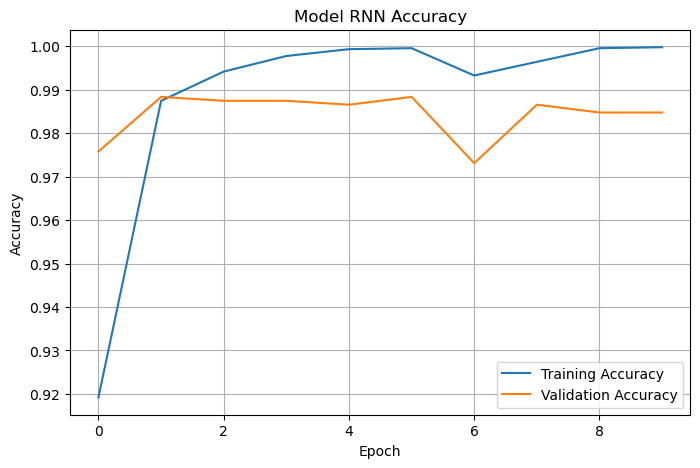

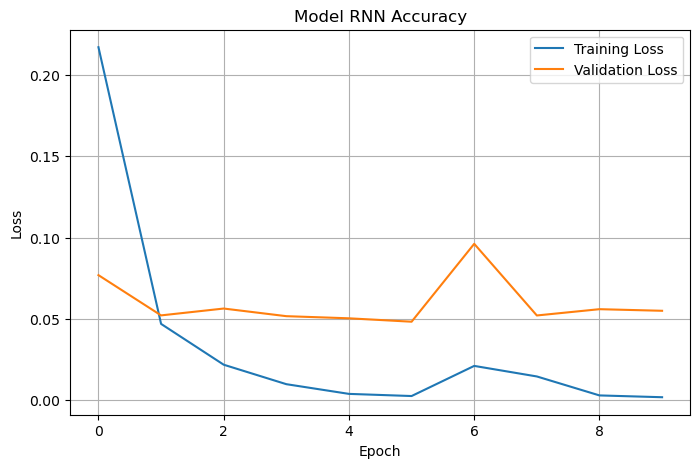

In [13]:
plot_history(rnn_history, "RNN")

In [14]:
rnn_model.evaluate(X_test, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9848 - loss: 0.0550


[0.05499625951051712, 0.9847533702850342]

In [17]:
rnn_model.save("../models/rnn_model.h5")

### LSTM

In [18]:
lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    LSTM(128),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.9280 - loss: 0.2071 - val_accuracy: 0.9812 - val_loss: 0.0620
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9886 - loss: 0.0473 - val_accuracy: 0.9892 - val_loss: 0.0456
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9948 - loss: 0.0205 - val_accuracy: 0.9901 - val_loss: 0.0444
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.9980 - loss: 0.0084 - val_accuracy: 0.9874 - val_loss: 0.0441
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9857 - val_loss: 0.0545
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9910 - val_loss: 0.0510
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9874 - val_loss: 0.0430
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.9993 - loss: 0.0018 - val_accuracy: 

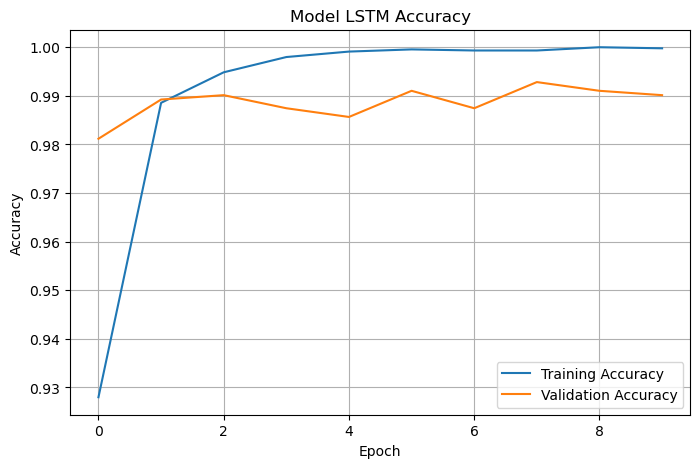

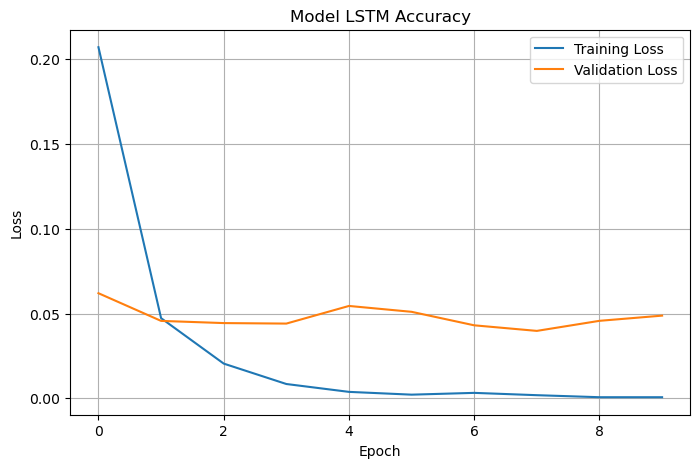

In [20]:
plot_history(lstm_history, "LSTM")

In [21]:
lstm_model.evaluate(X_test, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9901 - loss: 0.0488


[0.04875187575817108, 0.9901345372200012]

In [22]:
lstm_model.save("../models/lstm_model.h5")

### GRU

In [23]:
gru_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    GRU(128),
    Dense(1, activation='sigmoid')
])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.9152 - loss: 0.2372 - val_accuracy: 0.9865 - val_loss: 0.0619
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.9888 - loss: 0.0376 - val_accuracy: 0.9901 - val_loss: 0.0487
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.9969 - loss: 0.0132 - val_accuracy: 0.9919 - val_loss: 0.0468
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.9993 - loss: 0.0056 - val_accuracy: 0.9892 - val_loss: 0.0458
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9892 - val_loss: 0.0455
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9892 - val_loss: 0.0440
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9892 - val_loss: 0.0475
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - accuracy: 1.0000 - loss: 5.2499e-04 - val_

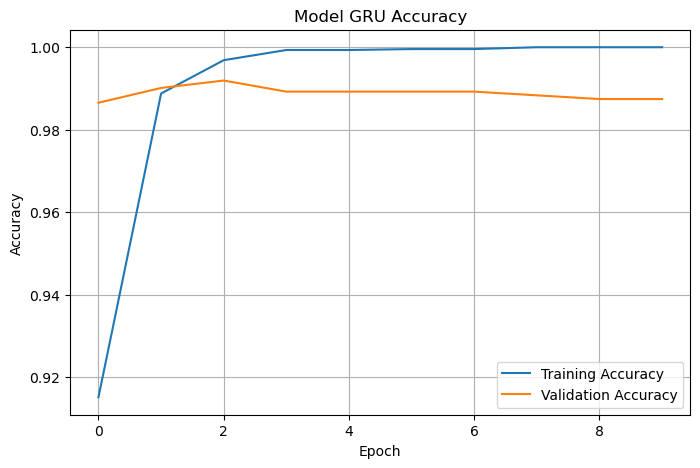

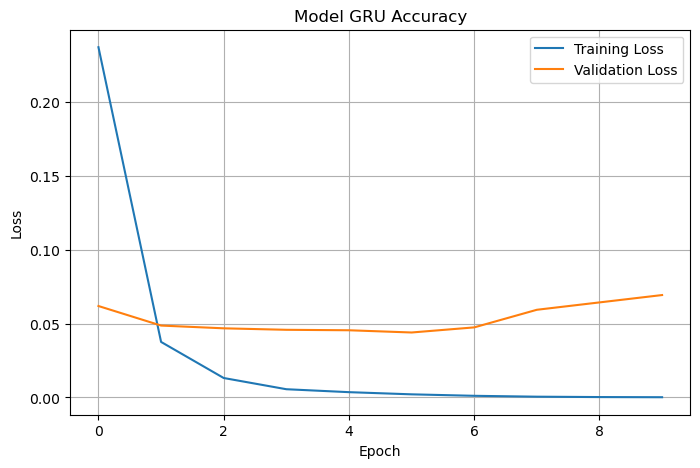

In [25]:
plot_history(gru_history, "GRU")

In [26]:
gru_model.evaluate(X_test, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9874 - loss: 0.0694


[0.0693601742386818, 0.9874439239501953]

In [27]:
gru_model.save("../models/gru_model.h5")